MASS-SPRING-DAMPER SYSTEM SIMULATION


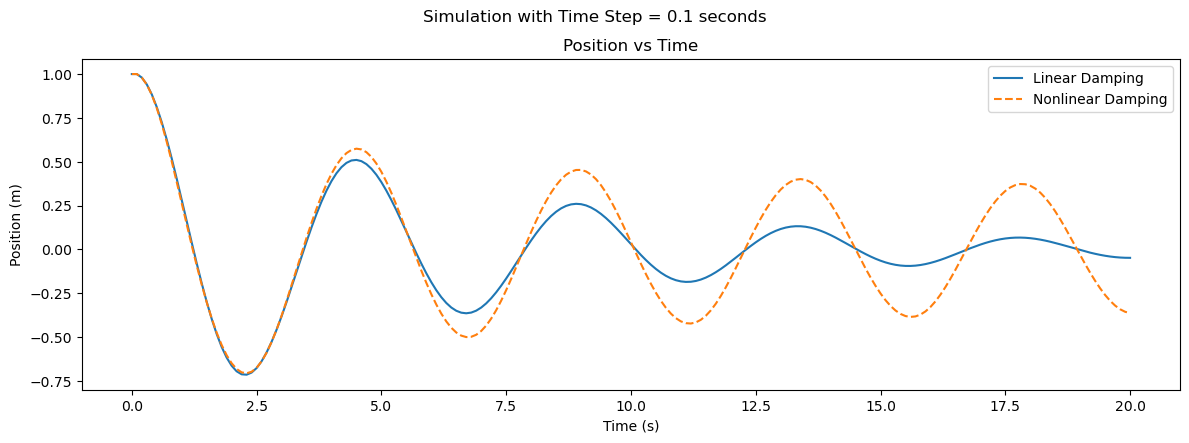

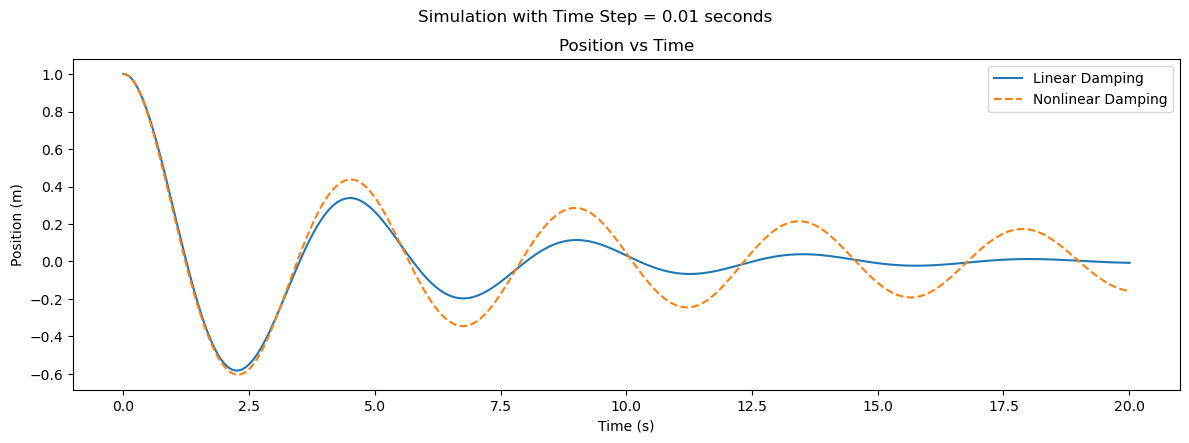

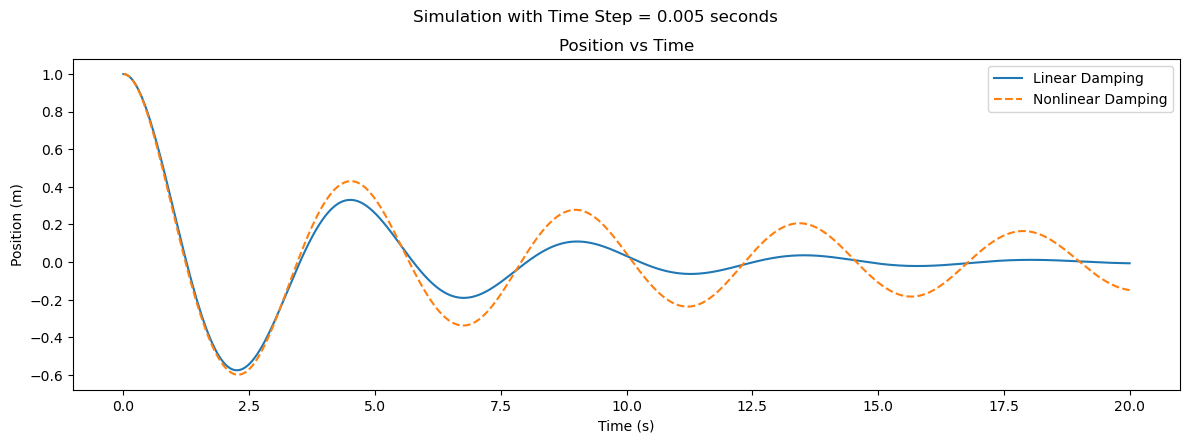

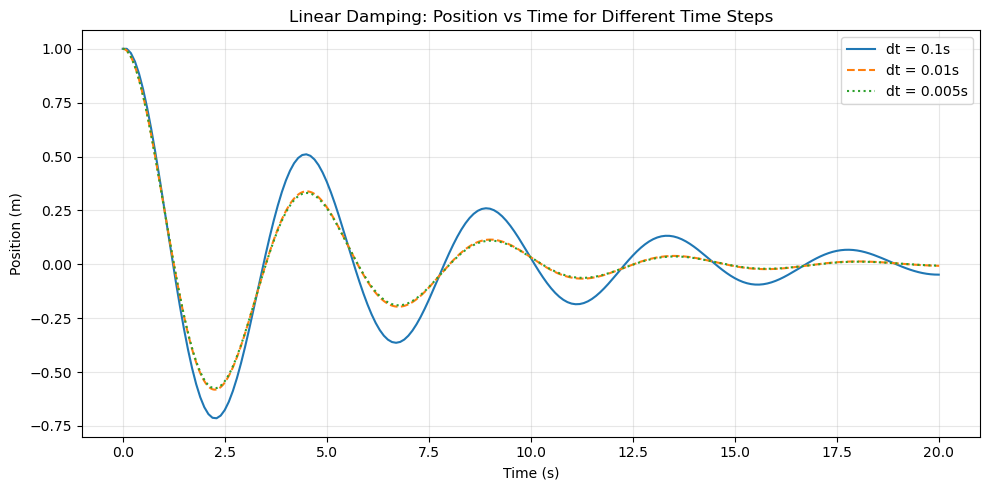

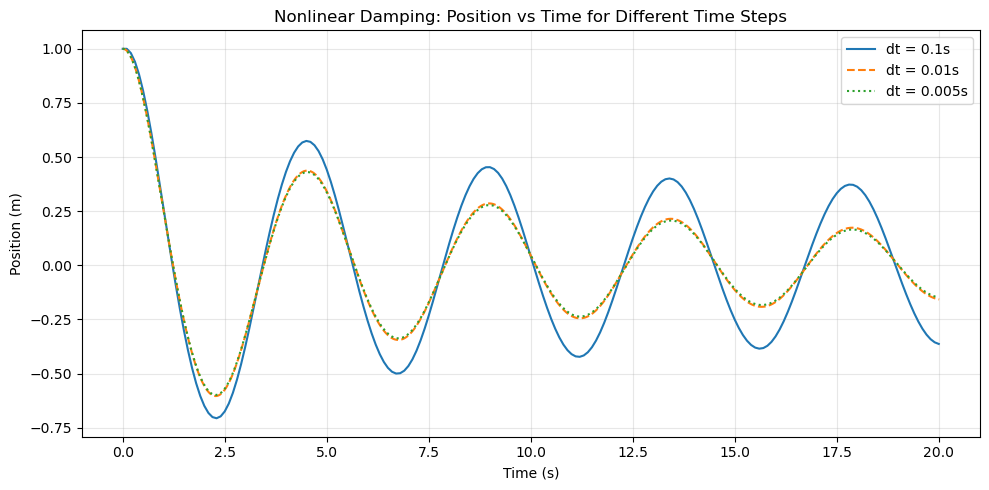

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def euler_method_linear(x1, x2,Ts,m,k,c):
    """
    Euler method of linear spring-damper system.
    ẋ₁(t) = x₂(t)
    ẋ₂(t) = -(k/m)x₁(t) - (c/m)x₂(t)
    Returns:

        Updated position and velocity after time step ts.
    """
    # Linear spring-damper system equations
    x1_dot= x2
    x2_dot= (-k/m)*x1 - (c/m)*x2


    # Euler method
    x1_new = x1 + x1_dot * Ts
    x2_new = x2 + x2_dot * Ts

    return x1_new, x2_new

def euler_method_nonlinear(x1, x2,Ts,m,k,c):
    """
    Euler method of nonlinear spring-damper system.
    ẋ₁(t) = x₂(t)
    ẋ₂(t) = -(k/m)x₁(t) - (c/m)|ẋ(t)|ẋ(t)
    Returns:

        Updated position and velocity after time step ts.
    """
    # Nonlinear spring-damper system equations
    x1_dot= x2
    x2_dot= (-k/m)*x1 - (c/m)*abs(x2)*x2


    # Euler method
    x1_new = x1 + x1_dot * Ts
    x2_new = x2 + x2_dot * Ts

    return x1_new, x2_new

def simulate_euler(m,k,c,x0,v0,T,Ts,damping_type="linear"):
    tt= np.arange( 0, T+Ts, Ts)
    Ns= tt.size
    #initialize state variables
    x1= np.zeros((Ns,1)) #position
    x2= np.zeros((Ns,1)) #velocity

    x1[0]= x0 #initial position
    x2[0]= v0 #initial velocity
    for i in range(Ns-1):
        if damping_type=="linear":
            x1[i+1], x2[i+1]= euler_method_linear(x1[i], x2[i], Ts, m, k, c)

        else:
            x1[i+1], x2[i+1]= euler_method_nonlinear(x1[i], x2[i], Ts, m, k, c)

    return tt, x1, x2
if __name__ == "__main__":
    print("MASS-SPRING-DAMPER SYSTEM SIMULATION")
    # Parameters
    m = 1.0
    k = 2
    c = 0.5
    x0 = 1.0
    v0 = 0.0
    T = 20.0
    Ts = [0.1, 0.01, 0.005]
    linear_results = {}
    nonlinear_results = {}

    # Simulate linear spring-damper system
    for dt in Ts:
        tt, x1_linear, x2_linear = simulate_euler(m, k, c, x0, v0, T, dt, damping_type="linear")
        linear_results[dt] = (tt, x1_linear, x2_linear)

    # Simulate nonlinear spring-damper system
    for dt in Ts:
        tt, x1_nonlinear, x2_nonlinear = simulate_euler(m, k, c, x0, v0, T, dt, damping_type="nonlinear")
        nonlinear_results[dt] = (tt, x1_nonlinear, x2_nonlinear)


    # Plot 1: Linear vs Nonlinear Damping for each time step
    for dt in Ts:
        tt, x1_linear, x2_linear = linear_results[dt]
        tt, x1_nonlinear, x2_nonlinear = nonlinear_results[dt]
        # Plot results
        plt.figure(figsize=(12, 8))
        plt.suptitle(f'Simulation with Time Step = {dt} seconds')
        plt.subplot(2,1,1)
        plt.plot(tt, x1_linear, label='Linear Damping')
        plt.plot(tt, x1_nonlinear, label='Nonlinear Damping', linestyle='--')
        plt.title('Position vs Time')
        plt.xlabel('Time (s)')
        plt.ylabel('Position (m)')
        plt.legend()
        plt.tight_layout()
        plt.show()
    # plot2: Linear Damping for different time steps
    plt.figure(figsize=(10, 5))
    linestyles = ['-', '--', ':']
    for i, dt in enumerate(Ts):
        tt, x1_linear, _ = linear_results[dt]
        plt.plot(tt, x1_linear,
                 label=f'dt = {dt}s',
                 linestyle=linestyles[i % len(linestyles)])
    plt.title('Linear Damping: Position vs Time for Different Time Steps')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# plot3: Nonlinear Damping for different time steps
plt.figure(figsize=(10, 5))
linestyles = ['-', '--', ':']
for i, dt in enumerate(Ts):
  tt, x1_nonlinear, _ = nonlinear_results[dt]
  plt.plot(tt, x1_nonlinear,
           label=f'dt = {dt}s',
           linestyle=linestyles[i % len(linestyles)])
plt.title('Nonlinear Damping: Position vs Time for Different Time Steps')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
